现在我们使用 Keras 库来学习手写数字分类。

我们这里要解决的问题是：将手写数字的灰度图像（28 像素×28 像素）划分到 10 个类别 中（0~9）。我们将使用 MNIST 数据集，它是机器学习领域的一个经典数据集，其历史几乎和这 个领域一样长，而且已被人们深入研究。这个数据集包含 60 000 张训练图像和 10 000 张测试图 像，由美国国家标准与技术研究院（National Institute of Standards and Technology，即 MNIST 中 的 NIST）在 20 世纪 80 年代收集得到。你可以将“解决”MNIST 问题看作深度学习的“Hello World”。


### MNIST 数据集可在 http://yann.lecun.com/exdb/mnist/ 获取, 它包含了四个部分:

    Training set images: train-images-idx3-ubyte.gz (9.9 MB, 解压后 47 MB, 包含 60,000 个样本)
    Training set labels: train-labels-idx1-ubyte.gz (29 KB, 解压后 60 KB, 包含 60,000 个标签)
    Test set images: t10k-images-idx3-ubyte.gz (1.6 MB, 解压后 7.8 MB, 包含 10,000 个样本)
    Test set labels: t10k-labels-idx1-ubyte.gz (5KB, 解压后 10 KB, 包含 10,000 个标签)

MNIST 数据集来自美国国家标准与技术研究所, National Institute of Standards and Technology (NIST). 

训练集 (training set) 由来自 250 个不同人手写的数字构成,
其中 50% 是高中学生, 50% 来自人口普查局 (the Census Bureau) 的工作人员. 

测试集(test set) 也是同样比例的手写数字数据.


### 首先我们加载Keras中的数据集

Keras已经包含了很多数据集，我们本例子中的数据集也包含在其中：

Populating the interactive namespace from numpy and matplotlib
image index:  0


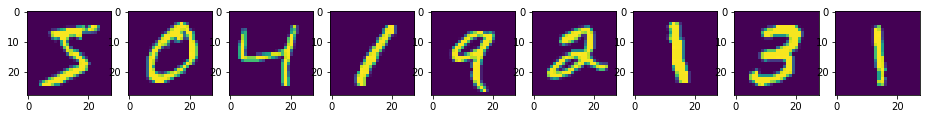

image index:  10000


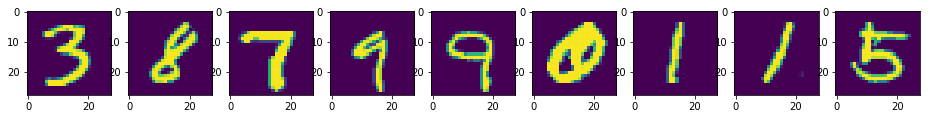

image index:  20000


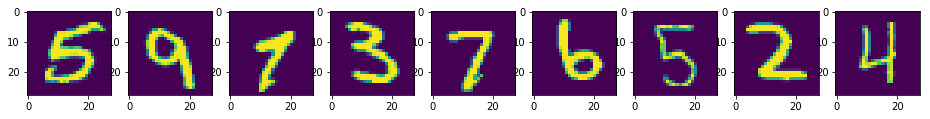

image index:  30000


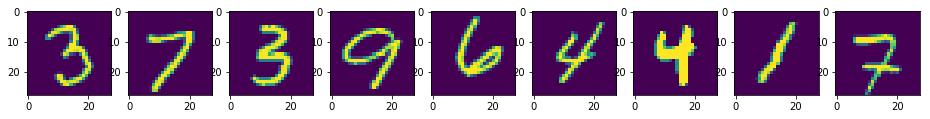

image index:  40000


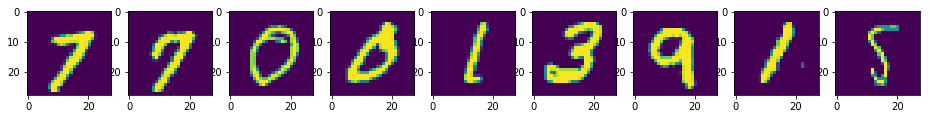

image index:  50000


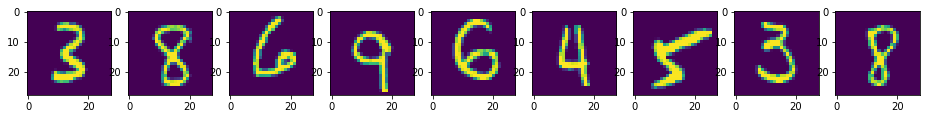

In [21]:
%pylab inline
import keras
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

for istart  in [0, 10000, 20000, 30000, 40000, 50000]:

    print('image index: ',istart)
    fig, axs = subplots(1,9, figsize=(16,4))

    row = 0
    for ax in axs:
            ax.imshow(X_train[row+istart]); row+=1
    plt.show()

### 接下来的工作流程如下：

    首先，将训练数据（train_images 和 train_labels）输入神经网络；
    其次，网络学习将图像和标签关联在一起；
    最后，网络对 test sample 生成预测.

# 1. 建立模型

The Sequential model is a linear stack of layers.

You can create a Sequential model by passing a list of layer instances to the constructor:

In [8]:
from keras import models
from keras import layers

nn = models.Sequential()

nn.add(layers.Dense(units = 512, activation="relu", input_shape =  (28*28,) ) )

nn.add(layers.Dense(10, activation='softmax'))

### 本例中的网络包含 2 个 Dense 层，它们是密集连接（也叫全连接）的神经层。

### 第二层（也是最后一层）是一个 10 路 softmax 层，它将返回一个由 10 个概率值（总和为 1）组成的数组。每个概率值表示当前数字图像属于 10 个数字类别中某一个的概率。

### 线性整流函数

In the context of artificial neural networks, the rectifier is an activation function defined as the positive part of its argument: 

$f(x) = x^+ = {\rm max} (0,x)$

A unit employing the rectifier is also called a **rectified linear unit (ReLU)**

该函数定义了该神经元在线性变换之后的非线性输出结果



### 为什么需要非线性的激活函数？

我们用人工神经网络来表述输入X与输出Y之间复杂的关系，用数学语言来说，就是用人工神经网络来实现复杂的函数。

使用线性激活函数，神经网络只是把输入线性组合再输出，无法实现对复杂函数的逼近。

非线性激活函数可以使神经网络随意逼近复杂函数。没有激活函数带来的非线性，多层神经网络和单层无异。非线性激活函数对深层神经网络的函数逼近能力起着至关重要的作用。

使用ReLU函数的好处是，对于所有大于0的输入，导数是恒定的，这能够加快训练网络的速度。

### 请参阅这篇文章，了解对神经网络的常见概念！

https://zhuanlan.zhihu.com/p/27186569

# 2. 编译(compile参数)

其中用到的主要有以下三个参数：

    损失函数（loss function）：网络如何衡量在训练数据上的性能，即网络如何朝着正确的方向前进。

    优化器（optimizer）：基于训练数据和损失函数来更新网络的机制。

    在训练和测试过程中需要监控的指标（metric）：本例只关心精度，即正确分类的图像所占的比例。

In [15]:
nn.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# 3.准备图像数据

在开始训练之前，我们将对数据进行预处理，将其变换为网络要求的形状，并缩放到所有值都在 [0, 1] 区间。

比如，之前训练图像保存在一个 uint8 类型的数组中，其形状为 (60000, 28, 28)，取值区间为 [0, 255]。我们需要将其变换为一个 float32 数组，其形状为 (60000, 28 * 28)，取值范围为 0~1。


In [4]:
X_train = X_train.astype('float32') / 255.; X_train = X_train.reshape((60000,28*28))
X_test  = X_test.astype('float32') / 255.; X_test = X_test.reshape((10000, 28*28))

X_train.shape

(60000, 784)

### 我们还需要对标签进行分类编码。

In [5]:
from keras.utils import to_categorical
 
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 4. 训练
在 Keras 中这一步是通过调用网络的 fit 方法来完成 

In [16]:
nn.fit(x=X_train, y=y_train, epochs=10, batch_size=1000)

Epoch 1/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0023 - acc: 0.9996
Epoch 2/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.0018 - acc: 0.9998
Epoch 3/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.0015 - acc: 0.9999
Epoch 4/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.0013 - acc: 0.9999
Epoch 5/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.0012 - acc: 0.9999
Epoch 6/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.0011 - acc: 1.0000
Epoch 7/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.0010 - acc: 1.0000
Epoch 8/10
60000/60000 [==============================] - 1s 16us/step - loss: 9.8718e-04 - acc: 1.0000
Epoch 9/10
60000/60000 [==============================] - 1s 16us/step - loss: 9.4080e-04 - acc: 1.0000
Epoch 10/10
60000/60000 [==============================] - 1s 16us/step - loss: 9.0255e-04 -

# 5. 测试精度

In [17]:
test_loss, test_acc = nn.evaluate(X_test, y_test)
print('test_acc:', test_acc)

10000/10000 [==============================] - 0s 25us/step
test_acc: 0.9824


### 同样的过程，用 sklearn，耗时久远(即使是一个简单的 20, 10 的MLP)...

In [23]:
from sklearn import neural_network

In [24]:
model = neural_network.MLPClassifier((20,10))

In [38]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(-1, 28*28)

In [39]:
import time

time1 = time.time()
print(model.fit(X_train, y_train, ))
time2 = time.time()
print(time2-time1)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
117.2736587524414


/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [42]:
from sklearn import metrics

In [44]:
metrics.accuracy_score(model.predict(X_test.reshape(-1, 28*28)), y_test)

0.9297

In [45]:
model = neural_network.MLPClassifier((512,10))

import time

time1 = time.time()
print(model.fit(X_train, y_train, ))
time2 = time.time()
print(time2-time1)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(512, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
477.1332745552063


In [47]:
metrics.accuracy_score(model.predict(X_test.reshape(-1, 28*28)), y_test)

0.9781